To activate virtual environment  type in terminal source env/bin/activate
To exit type deactivate

3 Graphs
- Age by year
- Male vs female age
- Age by each marathon
- Age for 2019 Indy Monumental

2nd data frame contains ultra marathons
- distance and age
- age by country

Open your notebook (.ipynb).
Click the kernel picker (top right of the notebook).
Choose venv as the kernel - it will be under Python Environments

Is this a different .ipynb?

Origninal csv too big, 109.7+ MB, for git hub. Had to reduce size. Made csv 2016-2019.
Original dataset at https://www.kaggle.com/datasets/runningwithrock/2010-2019-fall-marathons

Code to reduce size 
----
marathon_df = marathon_df[marathon_df['Year'] >= 2015]

-------
2nd data frane The big dataset of ultra-marathon running
https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/data

Will need size reduced

I have heard there there is a larger percentage of older adults, 50+, that engage in Ulta Endurance sports. Using the marathon as the basis race, compare the age difference btwn the different distances. (Marathon, 50k, 50m, 100k, 100m, and anything over grouped together.)

In [460]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


This code was the origingal data set that included Fall Marathons from 2010 - 2019. This was too large to upload to GitHub and reduced to 2016 - 2019.

marathon_df = pd.read_csv("/Users/justinmasters/Downloads/Results.csv")
marathon_df.head()

marathon_df = marathon_df[marathon_df['Year'] >= 2016]

In [461]:
marathon_df = pd.read_csv("/Users/justinmasters/Downloads/Results.csv")
marathon_df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket
0,Columbus Marathon,2015,Becky Williams,F,29,13645,Under 35
1,Columbus Marathon,2015,Jessica Sheahan,F,27,13648,Under 35
2,Columbus Marathon,2015,Kelsey Stief,F,27,13650,Under 35
3,Columbus Marathon,2015,Mehgan Cline,F,26,13650,Under 35
4,Columbus Marathon,2015,Stefanie Driesenga,F,28,13652,Under 35


The reduction is size was verified. 

In [462]:
# marathon_df.shape

A CSV was the created with the smaller dataframe

In [463]:
marathon_df.to_csv('Results2.csv', index=False)

In [464]:
# Create new csv with reduced df

# marathon_df.to_csv('Results2.csv', index=False)

The new CSV was then imported

In [465]:
marathon_df = pd.read_csv("/Users/justinmasters/Documents/DA_prereq_Justin_Masters/Notebooks/Age_and_Endurance/Data/Results2.csv")
marathon_df.head()

,Race,Year,Name,Gender,Age,Finish,Age Bracket
0,Richmond Marathon,2019,DAWN STADNYK,F,43,12847,40-44
1,Richmond Marathon,2019,ANDREW MARTIN,M,27,12812,Under 35
2,Richmond Marathon,2019,CAROL BRAUN,F,56,12844,55-59
3,Richmond Marathon,2019,PETER EMERSON,M,29,12816,Under 35
4,Richmond Marathon,2019,JACOB BARKER,M,18,12831,Under 35


Verify the number of rows and columns

In [466]:
marathon_df.shape


(779285, 7)

In [ ]:
marathon_df.info()

Find the min/max age for possible items to drop 

In [467]:
marathon_df.describe()

,Year,Age,Finish
count,779285.000000,779285.000000,779285.000000
mean,2017.479532,39.802386,16621.442168
std,1.122188,12.554135,3481.748727
min,2016.000000,-1.000000,7511.000000
25%,2016.000000,31.000000,14081.000000
50%,2017.000000,39.000000,16242.000000
75%,2018.000000,49.000000,18770.000000
max,2019.000000,116.000000,73460.000000


In [468]:
# Check for nulls

marathon_df.isnull().sum()

Race           0
Year           0
Name           0
Gender         5
Age            0
Finish         0
Age Bracket    0
dtype: int64

List all unique ages 

In [469]:
unique_values = sorted(marathon_df['Age'].unique())
unique_values

[np.int64(-1),
 np.int64(1),
 np.int64(6),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.int64(66),
 np.int64(67),
 np.int64(68),
 np.int64(69),
 np.int64(70),
 np.int64(71),
 np.int64(72)

I researched and found that the youngest person to run a marathon was Umi Taguchi at age 17 at the 2024 Honolulu Marathon . Drop ages younger than 17.

In [504]:
#drop ages younger than 17 and older than 98


def official_ages(marathon_df):
    valid_ages = (marathon_df['Age'] >= 17) & (marathon_df['Age'] <= 98)
    official_ages = marathon_df[valid_ages]

    return official_ages

In [507]:
# verify ages were dropped

valid_age_range = official_ages(marathon_df
                                )
unique_values = sorted(valid_age_range['Age'].unique())
unique_values

[np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.int64(66),
 np.int64(67),
 np.int64(68),
 np.int64(69),
 np.int64(70),
 np.int64(71),
 np.int64(72),
 np.int64(73),
 np.int64(74),
 np.int64(75),
 np.int64(76),
 np.int64(77),
 np.int64(78),
 np.int64(79),
 np.int64(80),
 np.int64(81),
 np.int64(82),
 np.int64(

Through research, the oldest person to run a marathon was Dimitrios Yordanidis in 1976 at age 98. Drop ages older than 98.

In [472]:
# recheck nulls 

marathon_df.isnull().sum()


Race           0
Year           0
Name           0
Gender         5
Age            0
Finish         0
Age Bracket    0
dtype: int64

Nulls were deleted when ages were trimmed

In [473]:
marathon_df.shape

(779285, 7)

Find invalid names

In [474]:
invalid_name = marathon_df['Name'].isnull()
print(invalid_name)

0         False
1         False
2         False
3         False
4         False
          ...  
779280    False
779281    False
779282    False
779283    False
779284    False
Name: Name, Length: 779285, dtype: bool


*******************************************************************************

In [475]:
# Check if there are any duplicates

marathon_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
779280    False
779281    False
779282    False
779283    False
779284    False
Length: 779285, dtype: bool

In [476]:
# Rename Gender column to Sex

marathon_df.rename(columns={'Gender': 'Sex'}, inplace=True)
marathon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779285 entries, 0 to 779284
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Race         779285 non-null  object
 1   Year         779285 non-null  int64 
 2   Name         779285 non-null  object
 3   Sex          779280 non-null  object
 4   Age          779285 non-null  int64 
 5   Finish       779285 non-null  int64 
 6   Age Bracket  779285 non-null  object
dtypes: int64(3), object(4)
memory usage: 41.6+ MB


In [477]:
# Assign Male and Female to M and F

marathon_df['Sex'] = marathon_df["Sex"].replace(['M', 'F'], ['Male', 'Female'])
marathon_df

,Race,Year,Name,Sex,Age,Finish,Age Bracket
0,Richmond Marathon,2019,DAWN STADNYK,Female,43,12847,40-44
1,Richmond Marathon,2019,ANDREW MARTIN,Male,27,12812,Under 35
2,Richmond Marathon,2019,CAROL BRAUN,Female,56,12844,55-59
3,Richmond Marathon,2019,PETER EMERSON,Male,29,12816,Under 35
4,Richmond Marathon,2019,JACOB BARKER,Male,18,12831,Under 35
...,...,...,...,...,...,...,...
779280,Marine Corps Marathon,2019,Daryl Young,Male,39,18575,35-39
779281,Marine Corps Marathon,2019,Ella Biggins,Female,24,18575,Under 35
779282,Marine Corps Marathon,2019,Kevin Klym,Male,44,18575,40-44
779283,Marine Corps Marathon,2019,Casey A Shapiro,Female,34,18578,Under 35


In [478]:
# group by sex and calculate the average total age

avg_age_by_sex = marathon_df.groupby("Sex")["Age"].mean().astype(int)
avg_age_by_sex

Sex
Female    38
Male      41
Name: Age, dtype: int64

Finding the average age by sex. Is there a significant difference?

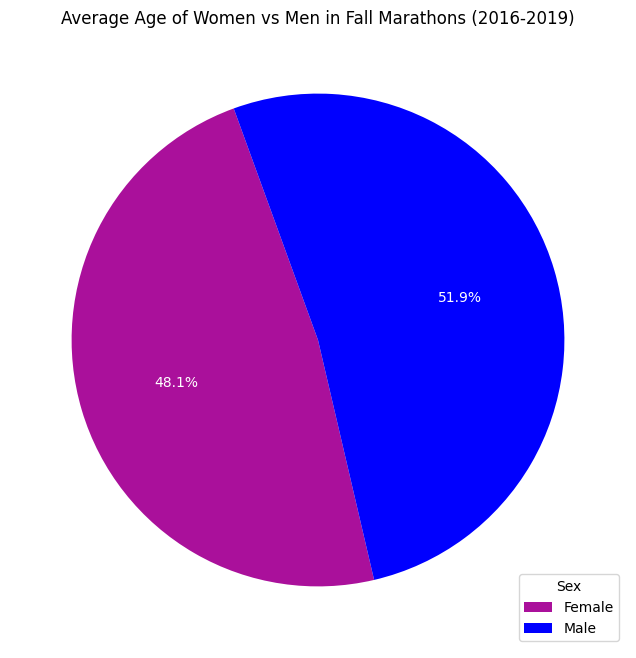

In [479]:

plt.figure(figsize=(8,8))
plt.pie(
    avg_age_by_sex,
    labels=None,
    startangle=110,
    colors=["#aa109b", "blue"],
    autopct="%1.1f%%",
    textprops={'color': "white"})

plt.title("Average Age of Women vs Men in Fall Marathons (2016-2019)")

plt.legend(
    labels = avg_age_by_sex.index, 
    loc="lower right",
    title = "Sex"
)


plt.show()

In [480]:
# determine what races are included

marathon_df['Race'].unique()

array(['Richmond Marathon', 'Columbus Marathon', 'Wineglass Marathon',
       'Lakefront Marathon', 'RnR Las Vegas Marathon',
       'Fox Cities Marathon', 'Madison Marathon', 'Air Force Marathon',
       'Atlantic City Marathon', 'Cape Cod Marathon',
       'Steamtown Marathon', 'Seattle Marathon', 'Grand Rapids Marathon',
       'Detroit International Marathon', 'Hartford Marathon',
       'Space Coast Marathon', 'Twin Cities Marathon',
       'REVEL Canyon City Marathon', 'Maine Marathon',
       'Portland Oregon Marathon', 'Kansas City Marathon',
       'Des Moines Marathon', 'Long Beach Marathon',
       'Erie Marathon at Presque Isle', 'St. George Marathon',
       'Indianapolis Monumental Marathon', 'Route 66 Marathon',
       'The Tunnel Lite Marathon', 'Mohawk-Hudson River Marathon',
       'Baystate Marathon', 'Moab Trail Marathon',
       'Mount Desert Island marathon', 'Akron Marathon', 'Via Marathon',
       'Milwaukee Running Festival Marathon', 'Omaha Marathon',
       '

In [481]:
# group by race and calculate average age

avg_age_by_race = marathon_df.groupby("Race")["Age"].mean().astype(int)
avg_age_by_race

Race
Air Force Marathon                     42
Akron Marathon                         40
Atlantic City Marathon                 41
Baltimore Marathon                     38
Baystate Marathon                      39
Big Cottonwood Marathon                40
Brooklyn Marathon                      35
Cape Cod Marathon                      39
Charlotte's Thunder Road Marathon      38
Chicago Marathon                       41
City of Oaks Marathon                  37
Columbus Marathon                      37
Des Moines Marathon                    39
Detroit International Marathon         19
Equinox Marathon                       41
Erie Marathon at Presque Isle          42
Fox Cities Marathon                    42
Fox Valley Marathon                    42
Grand Rapids Marathon                  40
Harrisburg Marathon                    42
Hartford Marathon                      40
Indianapolis Monumental Marathon       41
Kansas City Marathon                   39
Lakefront Marathon           

I ran a horizontal bar char and the number of races made it unreadable. Split into 3rds 

In [482]:
# Find number of unique races

total_unique_races = (marathon_df['Race'].nunique())
total_unique_races

56

In [483]:
# Determine the size of each third

third_of_races_int = total_unique_races // 3
third_of_races_int


18

In [484]:
# Get all diff race names 

unique_races = sorted(marathon_df['Race'].unique())

# Calculate how many races per third

third_of_races_int = len(unique_races) // 3  

# Divide the race names into thirds

races_first_third = unique_races[:third_of_races_int]
races_second_third = unique_races[third_of_races_int:2 * third_of_races_int]
races_final_third = unique_races[2 * third_of_races_int:]

# Filter based on race name

marathon_df_first_third = marathon_df[marathon_df['Race'].isin(races_first_third)]
marathon_df_second_third = marathon_df[marathon_df['Race'].isin(races_second_third)]
marathon_df_final_third = marathon_df[marathon_df['Race'].isin(races_final_third)]


In [485]:
# Verify splits and check each is different

marathon_df_first_third.head()

,Race,Year,Name,Sex,Age,Finish,Age Bracket
200,Columbus Marathon,2018,Elijah Rugut,Male,29,8566,Under 35
201,Columbus Marathon,2018,Josh Ordway,Male,38,8612,35-39
202,Columbus Marathon,2018,Brent Martin,Male,34,8659,Under 35
203,Columbus Marathon,2018,Luke Hickman,Male,25,8694,Under 35
204,Columbus Marathon,2018,Fan Zhou,Male,30,8744,Under 35


In [486]:
marathon_df_second_third.head()

,Race,Year,Name,Sex,Age,Finish,Age Bracket
400,Lakefront Marathon,2017,KATHERINE ALFT,Female,35,13899,35-39
401,Lakefront Marathon,2017,JACLYN MORELL,Female,23,13901,Under 35
402,Lakefront Marathon,2017,LYNDSAY SMANZ,Female,35,13902,35-39
403,Lakefront Marathon,2017,RICHARD IMMESBERGER,Male,52,13904,50-54
404,Lakefront Marathon,2017,PAUL SIVANICH,Male,65,13904,65-69


In [487]:
marathon_df_final_third.head()

,Race,Year,Name,Sex,Age,Finish,Age Bracket
0,Richmond Marathon,2019,DAWN STADNYK,Female,43,12847,40-44
1,Richmond Marathon,2019,ANDREW MARTIN,Male,27,12812,Under 35
2,Richmond Marathon,2019,CAROL BRAUN,Female,56,12844,55-59
3,Richmond Marathon,2019,PETER EMERSON,Male,29,12816,Under 35
4,Richmond Marathon,2019,JACOB BARKER,Male,18,12831,Under 35


Finding the average age of the fist third of marathons and call out youngest 

In [488]:
# get average age of first third

avg_age_by_first_third = marathon_df_first_third.groupby("Race")["Age"].mean().astype(int)
avg_age_by_first_third

Race
Air Force Marathon                   42
Akron Marathon                       40
Atlantic City Marathon               41
Baltimore Marathon                   38
Baystate Marathon                    39
Big Cottonwood Marathon              40
Brooklyn Marathon                    35
Cape Cod Marathon                    39
Charlotte's Thunder Road Marathon    38
Chicago Marathon                     41
City of Oaks Marathon                37
Columbus Marathon                    37
Des Moines Marathon                  39
Detroit International Marathon       19
Equinox Marathon                     41
Erie Marathon at Presque Isle        42
Fox Cities Marathon                  42
Fox Valley Marathon                  42
Name: Age, dtype: int64

Based off of the above info, there are no outliers in the oldest average age

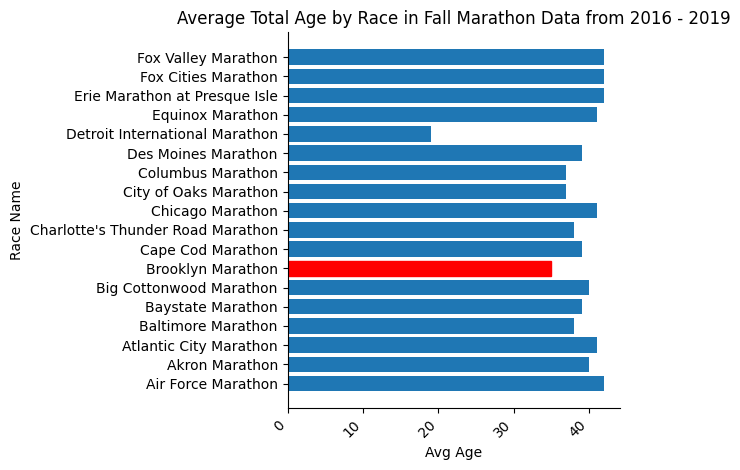

In [489]:
# plot the first third average age by race

bar = plt.barh(avg_age_by_first_third.index, avg_age_by_first_third.values)
bar[6].set_color('r')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Avg Age")
plt.ylabel("Race Name")
plt.title("Average Total Age by Race in Fall Marathon Data from 2016 - 2019")
plt.xticks(rotation=45, ha ="right")


plt.tight_layout()
plt.show()

Finding the average age of the second third of marathons and call out any abnormalities.
Testing a line graph to see if it is a better visualization

In [490]:
# get average age of second third

avg_age_by_second_third = marathon_df_second_third.groupby("Race")["Age"].mean().astype(int)
avg_age_by_second_third

Race
Grand Rapids Marathon                  40
Harrisburg Marathon                    42
Hartford Marathon                      40
Indianapolis Monumental Marathon       41
Kansas City Marathon                   39
Lakefront Marathon                     39
Long Beach Marathon                    41
Madison Marathon                       37
Maine Marathon                         39
Marine Corps Marathon                  41
Milwaukee Running Festival Marathon    39
Mo Cowbell Marathon                    39
Moab Trail Marathon                    40
Mohawk-Hudson River Marathon           41
Mount Desert Island marathon           40
NYC Marathon                           41
Naperville Marathon                    41
OBX Marathon                           41
Name: Age, dtype: int64

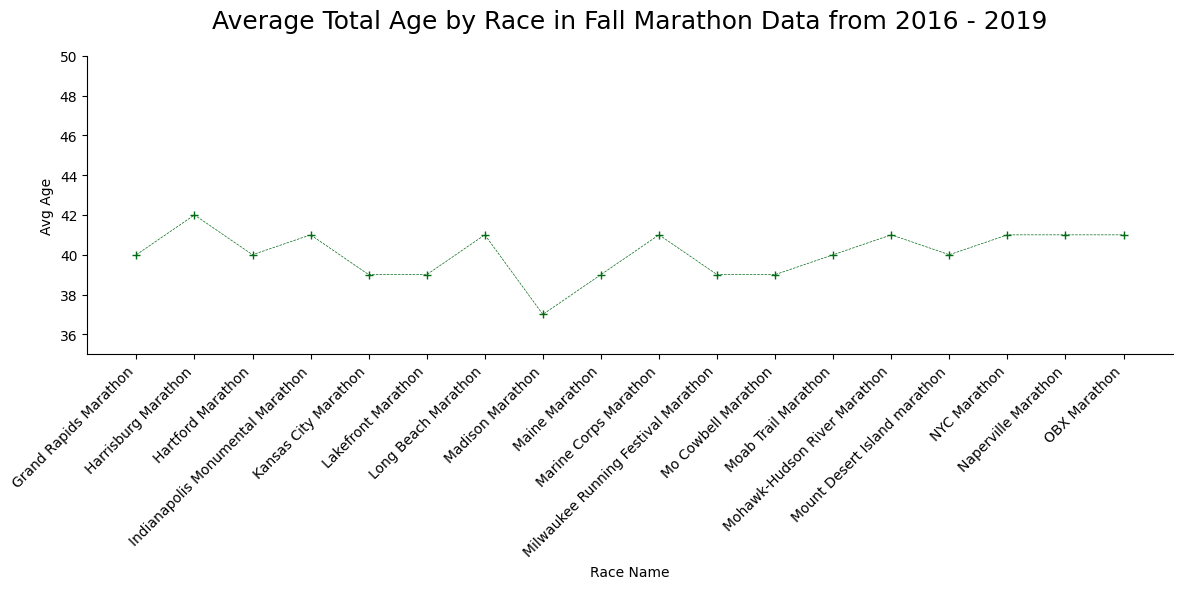

In [491]:
# Get the race(s) with the youngest avg age and plot the final second average age by race 

youngest_race = avg_age_by_second_third.idxmin()
youngest_age = avg_age_by_second_third.min()

plt.figure(figsize=(12, 6))
plt.plot(
    avg_age_by_second_third.index, 
    avg_age_by_second_third.values,
    marker="+",
    linestyle = "--",
    color = "#036b16",
    linewidth = 0.5)

plt.xlabel("Race Name")
plt.ylabel("Avg Age")
plt.title("Average Total Age by Race in Fall Marathon Data from 2016 - 2019", fontsize = 18, pad=20)
plt.xticks(rotation=45, ha ="right")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


plt.tight_layout()

plt.ylim(35, 50)
plt.show()

Finding the average age of the final third of marathons and call out youngest and oldest
Was not impressed with the line graph, will change for final

In [492]:
# get average age of final third

avg_age_by_final_third = marathon_df_final_third.groupby("Race")["Age"].mean().astype(int)
avg_age_by_final_third

Race
Omaha Marathon                      40
PORTLANDATHON                       41
Philadelphia Marathon               37
Portland Marathon                   39
Portland Oregon Marathon            39
REVEL Big Bear and Half Marathon    46
REVEL Canyon City Marathon          43
Richmond Marathon                   39
RnR Las Vegas Marathon              11
RnR Savannah Marathon               23
Route 66 Marathon                   42
Seattle Marathon                    37
Space Coast Marathon                43
St. George Marathon                 41
Steamtown Marathon                  41
The Tunnel Lite Marathon            46
Twin Cities Marathon                37
VENTURA MARATHON                    40
Via Marathon                        40
Wineglass Marathon                  41
Name: Age, dtype: int64

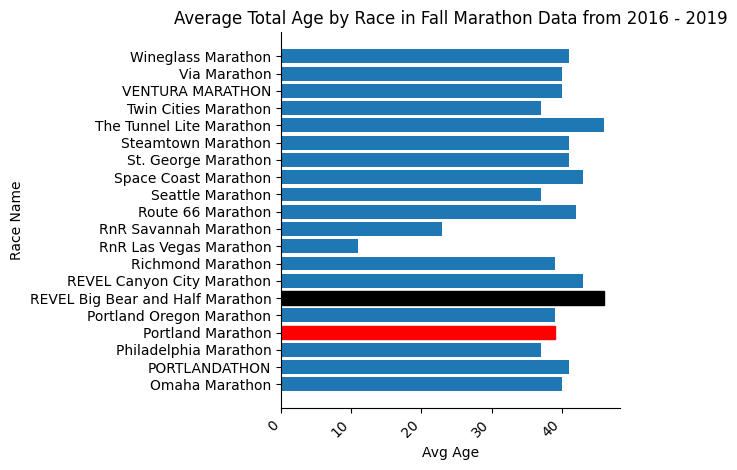

In [493]:
bar = plt.barh(avg_age_by_final_third.index, avg_age_by_final_third.values)
bar[3].set_color('r')
bar[5].set_color('black')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Avg Age")
plt.ylabel("Race Name")
plt.title("Average Total Age by Race in Fall Marathon Data from 2016 - 2019")
plt.xticks(rotation=45, ha ="right")


plt.tight_layout()
plt.show()

Finding the average age by year to see if there was a stand out year for marathons for youngest and oldest

In [494]:
# find average, yougest, and oldest by year

youngest_and_oldest_by_year = marathon_df.groupby('Year')['Age'].agg(['mean', 'min', 'max']).reset_index()
youngest_and_oldest_by_year.columns = ['Year', 'Average Age', 'Youngest Age', 'Oldest Age']
youngest_and_oldest_by_year


,Year,Average Age,Youngest Age,Oldest Age
0,2016,39.764620,-1,116
1,2017,40.511194,-1,99
2,2018,39.363840,-1,99
3,2019,39.563117,-1,99


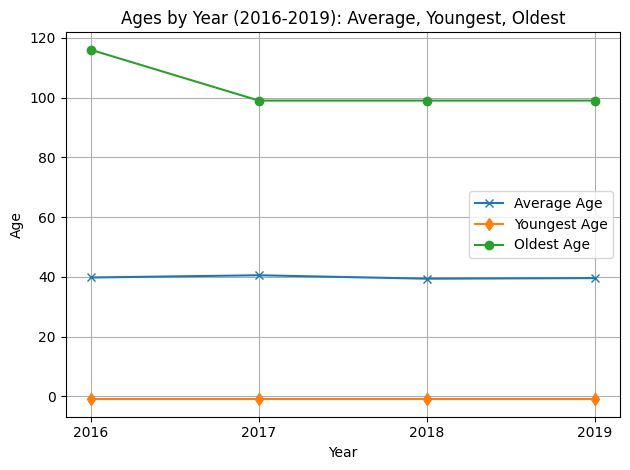

In [495]:
# plot

plt.Figure(figsize=(20, 10))
plt.plot(youngest_and_oldest_by_year['Year'], youngest_and_oldest_by_year['Average Age'], label='Average Age', marker='x')
plt.plot(youngest_and_oldest_by_year['Year'], youngest_and_oldest_by_year['Youngest Age'], label='Youngest Age', marker='d')
plt.plot(youngest_and_oldest_by_year['Year'], youngest_and_oldest_by_year['Oldest Age'], label='Oldest Age', marker='o')

plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Ages by Year (2016-2019): Average, Youngest, Oldest')
plt.legend()
plt.grid(True)
plt.xticks(youngest_and_oldest_by_year['Year'])
plt.tight_layout()

plt.show()

Humble not so humble brag that I have completed a marathon, and see where I fall in the overall average age

Possibly see where I stood in the overall avg age

In [496]:
# narrow dataset down to the marathon I completed

monumental_marathon_2019 = marathon_df[(marathon_df['Year'] == 2019) & (marathon_df['Race'] == 'Indianapolis Monumental Marathon')]
monumental_marathon_2019.head()

,Race,Year,Name,Sex,Age,Finish,Age Bracket
7838,Indianapolis Monumental Marathon,2019,Rachael Meyer,Female,24,15494,Under 35
7839,Indianapolis Monumental Marathon,2019,Andrea Kjos,Female,39,15495,35-39
7840,Indianapolis Monumental Marathon,2019,Renee Guthrie,Female,39,15495,35-39
7841,Indianapolis Monumental Marathon,2019,Jesse Maas,Female,24,15501,Under 35
7842,Indianapolis Monumental Marathon,2019,Tony Blevins,Male,44,15502,40-44


In [497]:
# create a csv of Indy Monumental

monumental_marathon_2019.to_csv('Indianapolis Monumental Marathon 2019')

In [498]:
# Get my stats

my_time = monumental_marathon_2019.iloc[2243]
my_time

Race           Indianapolis Monumental Marathon
Year                                       2019
Name                              Marie Connors
Sex                                      Female
Age                                          64
Finish                                    24687
Age Bracket                               60-64
Name: 182308, dtype: object

In [499]:
# Get average of all ages in all years

my_age = 39
total_avg_age = marathon_df['Age'].mean().astype(int)
total_avg_age


np.int64(39)

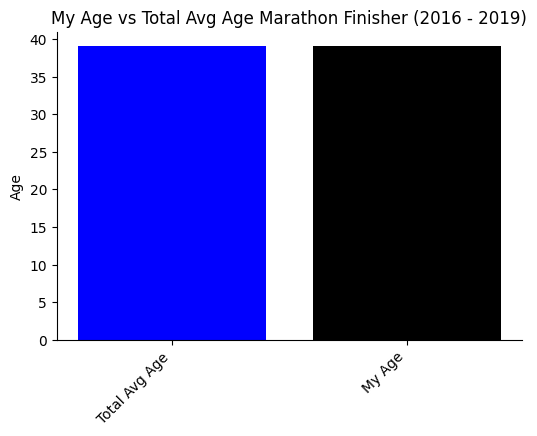

In [500]:
# compare my age to avg age for marathon finishers 2015*2019

plt.figure(figsize=(6,4))
plt.bar(['Total Avg Age', 'My Age'], [total_avg_age, my_age], color=['blue', 'black'])
plt.ylabel('Age')
plt.title('My Age vs Total Avg Age Marathon Finisher (2016 - 2019)')
plt.xticks(rotation=45, ha ="right")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Import Ultra Marathon csv. Reduced size. Origingal 740.0+ MB

In [501]:
# Import new csv

um_df = pd.read_csv("/Users/justinmasters/Documents/DA_prereq_Justin_Masters/Notebooks/Age_and_Endurance/Data/TWO_CENTURIES_OF_UM_RACES.csv")
um_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/justinmasters/Documents/DA_prereq_Justin_Masters/Notebooks/Age_and_Endurance/Data/TWO_CENTURIES_OF_UM_RACES.csv'

In [ ]:
um_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [ ]:
print(um_df['Year of event'])

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
7461190    1995
7461191    1995
7461192    1995
7461193    1995
7461194    1995
Name: Year of event, Length: 7461195, dtype: int64


In [ ]:
um_df = um_df[um_df['Year of event'] >= 2016]
um_df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609801,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:16:08 h,"*Peachtree City, GA",USA,1968.0,M,M50,7.141,1044739
3609802,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:27:05 h,"*Newport, PA",USA,1959.0,M,M60,7.027,50971
3609803,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:46:34 h,"*Flemington, NJ",USA,1955.0,F,W65,6.833,73152
3609804,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:55:29 h,"*Arlington, VA",USA,1965.0,M,M55,6.748,970133


In [ ]:
um_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3609806 entries, 0 to 3609805
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 385.6+ MB


In [ ]:
um_df.shape

(3609806, 13)

Utilized ChatGPT to as a learning tool to debug and explain the "why"

Final Thoughts Bullet points 

Use possible Choropleth in final with Ultra Marathon data and country of athlete or if home country of athlete age varies